In [0]:
!git clone https://github.com/sixtedemaupeou/yolov3.git

Cloning into 'yolov3'...
remote: Enumerating objects: 2250, done.
remote: Total 2250 (delta 0), reused 0 (delta 0), pack-reused 2250
Receiving objects: 100% (2250/2250), 2.38 MiB | 14.16 MiB/s, done.
Resolving deltas: 100% (1509/1509), done.


In [0]:
%cd yolov3
!ls

/content/yolov3
cfg   detect.py  models.py  requirements.txt  train.py	weights
data  LICENSE	 README.md  test.py	      utils


In [0]:
!pip3 install -U -r requirements.txt
!pip3 install --upgrade scikit-image
!pip3 install noise
!pip3 install GPyOpt
%reload_ext autoreload
%autoreload

Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 3)) (1.16.4)
     |████████████████████████████████| 26.6MB 1.5MB/s 
Requirement already up-to-date: torch>=1.0.0 in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 5)) (1.1.0)
     |████████████████████████████████| 13.1MB 58.8MB/s 
Requirement already up-to-date: pycocotools in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 7)) (2.0.0)
     |████████████████████████████████| 51kB 27.5MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 3.4.5.20
    Uninstalling opencv-python-3.4.5.20:
      Successfully uninstalled opencv-python-3.4.5.20
  Found existing installation: matplotlib 3.0.3
    Uninstalling matplotlib-3.0.3:
      Successfully uninstalled matplotlib-3.0.3
  Found existing installation: tqdm 4.28.1
    

Requirement already up-to-date: scikit-image in /usr/local/lib/python3.6/dist-packages (0.15.0)
     |████████████████████████████████| 133kB 3.3MB/s 
  Stored in directory: /root/.cache/pip/wheels/fd/a3/c1/d36defe6e9f074b25dc0f018eb9f8fdd675a7ef87071ce3821
Successfully built noise
     |████████████████████████████████| 61kB 2.9MB/s 
     |████████████████████████████████| 993kB 9.6MB/s 
     |████████████████████████████████| 71kB 31.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/33/1d/87/dc02440831ba986b1547dd11a7dcd44e893b0527083066d869
  Stored in directory: /root/.cache/pip/wheels/96/ee/cd/1c4dd7df63246b1e8de58af6d4457b7aed13509fdc0c918a13
  Stored in directory: /root/.cache/pip/wheels/c8/4a/0e/6e0dc85541825f991c431619e25b870d4b812c911214690cf8
Successfully built GPyOpt GPy paramz


In [0]:
%cd yolov3
!sh weights/download_yolov3_weights.sh
!mkdir output
!mkdir data/gaussian

/content/yolov3
--2019-06-04 10:54:46--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  63.6MB/s    in 3.9s    

2019-06-04 10:54:50 (60.7 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



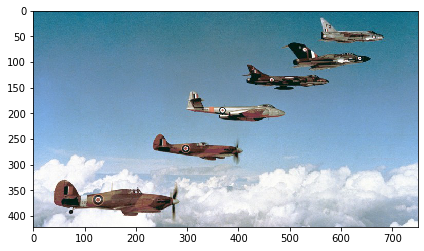

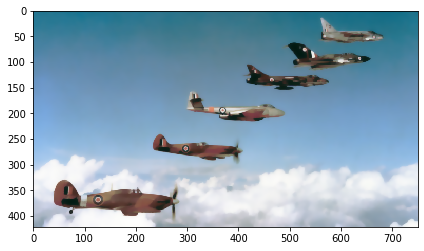

In [0]:
from skimage import io
from skimage.restoration import denoise_tv_chambolle
import numpy as np
import random

image = io.imread('data/samples/aeroplanes.jpg')
io.imshow(image)
io.show()

# rows = image.shape[0]
# cols = image.shape[1]
# channels = image.shape[2]

# image = image.reshape(image.shape[0] * image.shape[1], 3)
# noise = np.empty((rows, cols), dtype = np.int8)
# for i in range(rows):
#   for j in range(cols):
#     noise[i][j] = random.randrange(-16, 17, 32)
    
# if channels > 1:
#   noise = np.repeat(noise, channels)
#   noise = noise.reshape(rows, cols, channels)
# 
# image = image + noise
# image = np.clip(image, 0, 255)

io.imshow(denoise_tv_chambolle(image, weight=0.1, multichannel=True))

    
io.imsave('data/kmeans_aeroplanes.jpg',image)

/usr/local/lib/python3.6/dist-packages/skimage/filters/_gaussian.py:122: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))


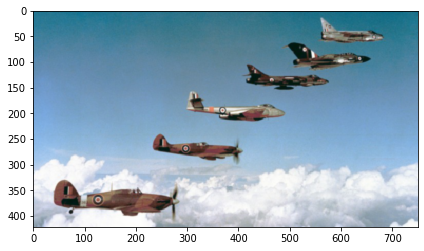

In [0]:
import skimage

filtered_img = skimage.filters.gaussian(io.imread('data/samples/aeroplanes.jpg'))

io.imshow(filtered_img)
io.imsave('data/filtered_aeroplanes.jpg',filtered_img)

In [0]:
from detect import detect

result = detect(model, "data/filtered_aeroplanes.jpg")
# Model returns [[x1, y1, x2, y2, conf, cls_conf, cls]]

img = io.imread("output/filtered_aeroplanes.jpg")
fig = plt.gcf()
fig.set_size_inches(9, 5)
plt.axis("off")
plt.imshow(img)
plt.show()

NameError: ignored

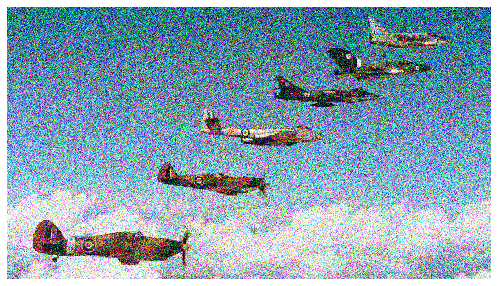

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import util, io

# May use Gaussian, localvar s&p, salt, pepper, poisson, speckle
img = util.random_noise(io.imread("data/samples/aeroplanes.jpg"), mode="gaussian", var=0.06, clip=True)
io.imsave("data/gaussian/aeroplanes.jpg", img)

fig = plt.gcf()
fig.set_size_inches(9, 5)
plt.axis("off")
plt.imshow(img)
plt.show()

In [0]:
from detect import detect, init_model

model, device = init_model("cfg/yolov3.cfg", "weights/yolov3.weights")


Using cuda _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)



Using cuda _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)

image 1/1 data/gaussian/aeroplanes.jpg: 6 airplanes, 1 kites, Done. (0.153s)


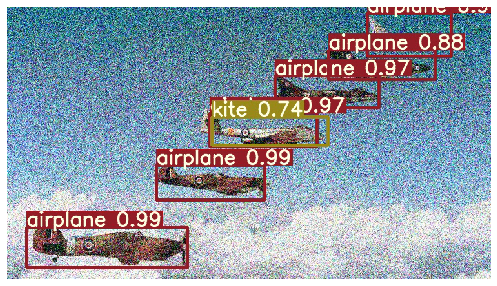

In [0]:
result = detect(model, "data/gaussian/aeroplanes.jpg")
# Model returns [[x1, y1, x2, y2, conf, cls_conf, cls]]

img = io.imread("output/aeroplanes.jpg")
fig = plt.gcf()
fig.set_size_inches(9, 5)
plt.axis("off")
plt.imshow(img)
plt.show()

In [0]:
from noise import pnoise2

# Normalize vector
def normalize(vec):
    vmax = np.amax(vec)
    vmin  = np.amin(vec)
    return (vec - vmin) / (vmax - vmin)

# Perturb original image and clip to maximum perturbation
def perturb(orig, max_norm, noise):
    noise = np.sign(noise) * max_norm
    noise = np.clip(noise, np.maximum(-orig, -max_norm), np.minimum(255 - orig, max_norm))
    return (orig + noise)

# Generate Perlin noise with sine function mapping
def perlin(dim_x, dim_y, period_x, period_y, octave, freq_sine, lacunarity = 2):
    
    # Perlin noise
    noise = np.empty((dim_x, dim_y), dtype = np.float32)
    for x in range(dim_x):
        for y in range(dim_y):
            noise[x][y] = pnoise2(x / period_x, y / period_y, octaves = octave, lacunarity = lacunarity)
            
    # Preprocessing and sine function color map
    noise = normalize(noise)
    noise = np.sin(noise * freq_sine * np.pi)
    noise = np.repeat(noise, 3)
    return noise.reshape(dim_x, dim_y, 3)

Using cuda _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)

image 1/12 data/samples/COCO_val2014_000000031521.jpg: 1 persons, 1 wine glasss, 1 cups, 2 chairs, 1 potted plants, 1 dining tables, 1 laptops, Done. (0.053s)
image 2/12 data/samples/COCO_val2014_000000203661.jpg: 2 bottles, 1 wine glasss, 4 cups, 4 knifes, 2 spoons, 2 bowls, 1 chairs, 1 dining tables, 1 microwaves, 1 sinks, Done. (0.061s)
image 3/12 data/samples/COCO_val2014_000000420339.jpg: 12 persons, 2 cars, 1 traffic lights, 2 cell phones, Done. (0.059s)
image 4/12 data/samples/aeroplanes.jpg: 6 airplanes, Done. (0.039s)
image 5/12 data/samples/dog.jpg: 1 bicycles, 1 trucks, 1 dogs, Done. (0.038s)
image 6/12 data/samples/perturbed.jpg: 1 persons, 1 wine glasss, 1 cups, 2 chairs, 1 potted plants, 1 dining tables, 1 laptops, Done. (0.043s)
image 7/12 data/samples/zidane-0.jpg: 1 persons, 1 wine glasss, 1 cups, 2 chairs, 1 potted plants, 1 dining tables, 1 laptops, Do

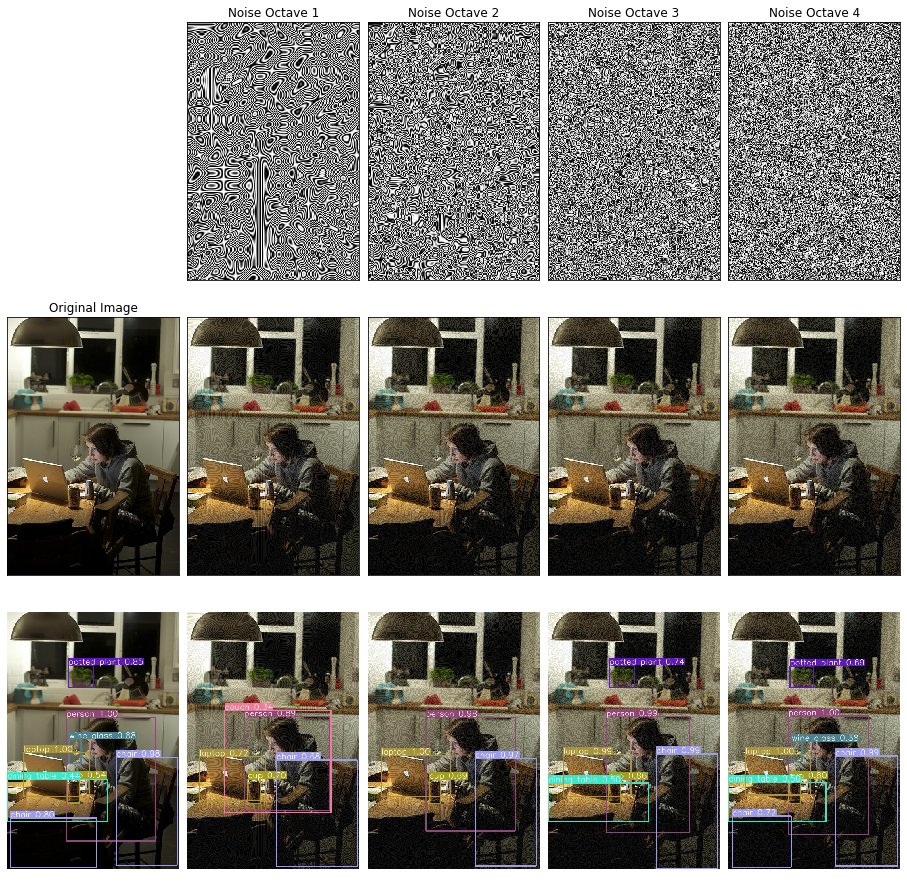

In [0]:
from ipywidgets import interactive
from ipywidgets import Dropdown, FloatSlider, IntSlider
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

def PlotPerlin(max_norm, period_x, period_y, freq_sine):
    image = io.imread("data/samples/COCO_val2014_000000031521.jpg").astype(np.float)
    (dim_x, dim_y, _) = image.shape
    fig = plt.figure(figsize = (16, 16))
    plt.axis('off')
    plt.subplots_adjust(wspace = 0.05, hspace = 0.05)
    
    # Subplots
    for i in range(2):
        for j in range(5):
            ax = fig.add_subplot(3, 5, i * 5 + j + 1)
            
            # Remove ticks
            plt.setp(ax.get_xticklabels(), visible=False)
            plt.setp(ax.get_yticklabels(), visible=False)
            ax.tick_params(axis = 'both', which = 'both', length = 0)
            ax.grid(False)
            
            # Adversarial perturbations
            if j != 0:
              noise = perlin(dim_x = dim_x, dim_y = dim_y, period_x = period_x, period_y = period_y, octave = j, freq_sine = freq_sine)
            if i == 0:
                if j == 0:
                    # No noise
                    noise = np.ones((dim_x, dim_y, 3))
                    plt.axis('off')
                else:
                    ax.set_title('Noise Octave %i' % j)
                payload = (noise.reshape(dim_x, dim_y, 3) + 1) / 2
                io.imsave(fname='noise'+str(j)+'.png', arr=payload)
                plt.imshow(payload, cmap = plt.cm.gray)
                
            # Adversarial examples
            else:
                if j == 0:
                    noise = np.zeros((dim_x, dim_y, 3))
                    ax.set_title('Original Image')
                payload = perturb(orig = image, max_norm = max_norm, noise = noise)                
                plt.imshow(payload.astype(np.uint8))
                io.imsave(fname="data/samples/zidane-" + str(j) + ".jpg", arr=payload.astype(np.uint8))
    
    detect(model, "data/samples")
    
    for k in range(5):
      ax = fig.add_subplot(3, 5, 11+k)
      ax.grid(False)
      output_img = io.imread("output/zidane-" + str(k) + ".jpg").astype(np.float)
      plt.axis('off')
      plt.imshow(output_img.astype(np.uint8))
      
# Parameter sliders
# s_img_key = Dropdown(options = list(all_images.keys()), value = 'Boat', description = 'Image:')
s_max_norm = IntSlider(min = 0, max = 64, value = 16, step = 2, continuous_update = False, description = 'Max Change:')
s_period_x = IntSlider(min = 2, max = 180, value = 60, step = 1, continuous_update = False, description = 'Period X:')
s_period_y = IntSlider(min = 2, max = 180, value = 60, step = 1, continuous_update = False, description = 'Period Y:')
s_freq_sine = IntSlider(min = 0, max = 60, value = 36, step = 1, continuous_update = False, description = 'Freq Sine:')

# interactive(PlotPerlin,
#                  max_norm = s_max_norm,
#                  period_x = s_period_x,
#                  period_y = s_period_y,
#                  freq_sine = s_freq_sine)

PlotPerlin(16, 60, 60, 49)

In [0]:
#Helper function for Bayesian optimisation
# Assumes original image has shape (dim, dim, 3)
# Includes bounds for Bayesian optimization
def get_noise_f(dim_x, dim_y):
  def noise_func(params):
    freq, freq_sin, octave = params
    octave = int(octave)
    
    # Base Perlin noise
    noise = np.empty((dim_x, dim_y), dtype = np.float32)
    for x in range(dim_x):
        for y in range(dim_y):
            noise[x][y] = pnoise2(x * freq, y * freq, octaves = octave)
            
    # Preprocessing and sine function color map
    noise = normalize(noise)
    noise = np.sin(noise * freq_sin * np.pi)
#    noise_r = np.sin(noise * freq_sin_r * np.pi)
#    noise_g = np.sin(noise * freq_sin_g * np.pi)
#    noise_b = np.sin(noise * freq_sin_b * np.pi)
#    noise = np.stack([noise_r, noise_g, noise_b], axis=2)
    noise = np.repeat(noise, 3)
    return noise.reshape(dim_x, dim_y, 3)
        
    # Parameter boundaries for Bayesian optimization
  bounds = [{'name' : 'freq', 'type' : 'continuous', 'domain' : (1 / 160, 1 / 20), 'dimensionality' : 1},
            {'name' : 'freq_sin', 'type' : 'continuous', 'domain' : (4, 32), 'dimensionality' : 1},
#            {'name' : 'freq_sin_r', 'type' : 'continuous', 'domain' : (4, 32), 'dimensionality' : 1},
#            {'name' : 'freq_sin_g', 'type' : 'continuous', 'domain' : (4, 32), 'dimensionality' : 1},
#            {'name' : 'freq_sin_b', 'type' : 'continuous', 'domain' : (4, 32), 'dimensionality' : 1},
            {'name' : 'octave', 'type' : 'discrete', 'domain' : (1, 2, 3, 4), 'dimensionality' : 1}]
        
  return noise_func, bounds

In [0]:
def get_classes(result):
  classes = np.zeros(80)
  if result != []:
    result = result[0]
    for res in result:
      classes[int(res[6])] += 1
  return classes

def get_avg_conf(result):
  if result == []:
    return 0
  else:
    result = result[0].cpu()
    return sum([res[4] * res[5] for res in result]) / len(result)
  
def get_bicycle_conf(result):
  objective = 0
  if result == []:
    return 0
  for res in result[0].cpu():
    # 1 is encoding of bicycle class
    # Index 6 is class
    if res[6] == 1:
      objective += (5 * res[5])
    else:
      # Index 5 is class confidence
      objective -= res[5]
  return objective

def get_iou_one_obj(x1, x2, y1, y2, x3, x4, y3, y4):
  int_x_left = max(x1, x3)
  int_x_right = min(x2, x4)
  int_y_top = max(y1, y3)
  int_y_bot = min(y2, y4)
  
  if int_x_left < int_x_right and int_y_top < int_y_bot:
    int_area = (int_x_right - int_x_left) * (int_y_bot - int_y_top)
    uni_area = (x2 - x1) * (y2 - y1) + (x4 - x3) * (y4 - y3) - int_area
    iou = int_area / uni_area
  else:
    iou = 0
  
  return iou

In [0]:
import GPyOpt

max_norm = 12
max_query = 20
init_query = 5
image_path = "data/samples/perturbed.jpg" #"data/samples/COCO_val2014_000000031521.jpg"

orig_image = io.imread(image_path).astype(np.float)
(dim_x, dim_y, _) = orig_image.shape


noise_func, bounds = get_noise_f(dim_x, dim_y)

target_result = detect(model, image_path)
print(target_result)
# orig_image_classes = get_classes(detect(model, image_path))

# Generates a dictionary with classes detected in result as keys and maps with 1 in regions of detection
def get_label_maps(result):
  if result == []:
    return []
  result = result[0].cpu()
  labels = np.unique([res[6].item() for res in result])
  label_maps = {}
  for label in labels:
    label_map = np.zeros((dim_x, dim_y))
    for res in result:
      if int(res[6]) == label:
#           print(int(res[0]), int(res[2]), int(res[1]), int(res[3]))
#           label_map[int(res[1]):min(int(res[3]), dim_x)][int(res[0]):min(int(res[2]), dim_y)] = 1
          for i in range(int(res[0]), min(int(res[2]), dim_y)):
            for j in range(int(res[1]), min(int(res[3]), dim_x)):
              label_map[j][i] = 1
    label_maps[label] = label_map
  return label_maps 

# Generates average IOU over all classes (not instances)
def getIOU(target_label_maps, result):
  label_maps = get_label_maps(result)
  labels = list(label_maps)
  target_labels = list(target_label_maps)
    
  # common_labels = np.intersect1d(labels, target_labels)
  total_labels_len = len(set(labels + target_labels))
    
  ious = []
  
  for target_label in target_labels:
    target_map = target_label_maps[target_label]
    if target_label in label_maps:
      label_map = label_maps[target_label]
      combined_map = label_map + target_map
      unique, counts = np.unique(combined_map, return_counts=True)
      counts_dict = dict(zip(unique, counts))
      # Intersection is no of elements for which the sum of maps is 2
      inter = counts_dict[2] if 2 in counts_dict else 0
      union = np.count_nonzero(combined_map)
      ious.append(inter / union)
      
  return sum(ious) / total_labels_len

def get_iou_one_obj(x1, x2, y1, y2, x3, x4, y3, y4):
  int_x_left = max(x1, x3)
  int_x_right = min(x2, x4)
  int_y_top = max(y1, y3)
  int_y_bot = min(y2, y4)

  if int_x_left < int_x_right and int_y_top < int_y_bot:
    int_area = (int_x_right - int_x_left) * (int_y_bot - int_y_top)
    uni_area = (x2 - x1) * (y2 - y1) + (x4 - x3) * (y4 - y3) - int_area
    iou = int_area / uni_area
  else:
    iou = 0

  return iou

def get_avg_iou(target_result, actual_result):
  print(target_result)
  # shape [[x1, y1, x2, y2, conf, cls_conf, cls]]
  if target_result == [] or actual_result == []:
    return 0
  target_result = target_result[0].detach().cpu()
  actual_result = actual_result[0].detach().cpu()
  # If no detection want to return 0
  ious = [0]
  for target_res in target_result:
    for actual_res in actual_result:
      target_x1 = target_res[0]
      target_x2 = target_res[2]
      target_y1 = target_res[1]
      target_y2 = target_res[3]
      target_cls = target_res[6]


      actual_x1 = actual_res[0]
      actual_x2 = actual_res[2]
      actual_y1 = actual_res[1]
      actual_y2 = actual_res[3]
      actual_cls = actual_res[6]

      if actual_cls == target_cls:
        curr_iou = get_iou_one_obj(target_x1, target_x2, target_y1, target_y2, actual_x1, actual_x2, actual_y1, actual_y2)
        if curr_iou >= 0.5:
          ious.append(curr_iou)
          break
  return sum(ious) / len(target_result)

classes_areas = get_label_maps(detect(model, image_path))

# Initial queries for Bayesian optimization
np.random.seed(0)
feasible_space = GPyOpt.Design_space(space = bounds)        
initial_design = GPyOpt.experiment_design.initial_design('random', feasible_space, init_query)

Using cuda _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)

image 1/1 data/samples/perturbed.jpg: 1 persons, 2 cups, 1 chairs, 1 laptops, Done. (0.050s)
[]
Using cuda _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)

image 1/1 data/samples/perturbed.jpg: 1 persons, 2 cups, 1 chairs, 1 laptops, Done. (0.049s)


GPyOpt minimizes the objective function.

In [0]:
# Objective function
class objective_func:
    def __init__(self):
        pass
#     # Maximises the difference in objects detected
    def f(self, params):
        params = params[0]
        payload = perturb(orig_image, max_norm, noise_func(params))
        io.imsave(fname="data/samples/perturbed.jpg", arr=payload.astype(np.uint8))        
#         perturbed_image_classes = get_classes(detect(model, "data/samples/zidane-perturbed.jpg"))
#         return -sum(np.absolute(orig_image_classes - perturbed_image_classes))

#         return get_avg_conf(detect(model, "data/samples/zidane-perturbed.jpg"))
        
#         return get_bicycle_conf(detect(model, "data/samples/perturbed.jpg"))

        avg_iou = get_avg_iou(target_result, detect(model, "data/samples/perturbed.jpg"))
        print(avg_iou)
        return avg_iou

#         return getIOU(classes_areas, detect(model, "data/samples/perturbed.jpg"))

In [0]:
best_f = 1
queries = 0
obj_func = objective_func()

# Gaussian process and Bayesian optimization
objective = GPyOpt.core.task.SingleObjective(obj_func.f, num_cores = 1)
gp_model = GPyOpt.models.GPModel(exact_feval = False, optimize_restarts = 5, verbose = False)
aquisition_opt = GPyOpt.optimization.AcquisitionOptimizer(feasible_space)
acquisition = GPyOpt.acquisitions.AcquisitionEI(gp_model, feasible_space, optimizer = aquisition_opt)
evaluator = GPyOpt.core.evaluators.Sequential(acquisition, batch_size = 1)

# Attack

In [0]:
BOpt = GPyOpt.methods.ModularBayesianOptimization(gp_model, feasible_space, objective, acquisition, evaluator, initial_design)

while queries < max_query:
    queries += 1
    BOpt.run_optimization(max_iter = 1)
    best_f = BOpt.fx_opt
    # if queries % 5 == 0:
    print('Query %i, Objective Function %0.2f' % (queries, best_f)) # Print every 5th query

if best_f > 0.5:
    print('Attack failed.')
else:
    print('Success!')
    
# Evaluate best parameters
params = BOpt.x_opt
payload = perturb(orig_image, max_norm, noise_func(params))
io.imsave(fname="data/samples/perturbed.jpg", arr=payload.astype(np.uint8))        
detect(model, "data/samples/perturbed.jpg")

print('Objective function value:', best_f)
print('Parameters:', params)

Using cuda _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)

image 1/1 data/samples/perturbed.jpg: 1 persons, 2 cups, 1 chairs, 1 laptops, Done. (0.050s)
[]
0
Using cuda _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)

image 1/1 data/samples/perturbed.jpg: 1 persons, 1 wine glasss, 2 cups, 2 chairs, 1 potted plants, 1 dining tables, 1 laptops, Done. (0.053s)
[]
0
Using cuda _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)

image 1/1 data/samples/perturbed.jpg: 1 persons, 1 wine glasss, 1 cups, 1 chairs, 1 potted plants, 1 dining tables, 1 laptops, Done. (0.052s)
[]
0
Using cuda _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)

image 1/1 data/samples/perturbed.jpg: 1 persons, 1 wine glasss, 1 cups, 1 chairs, 1 couchs, 1 laptops, Done. (0.050s)
[]
0
Using cuda _CudaD

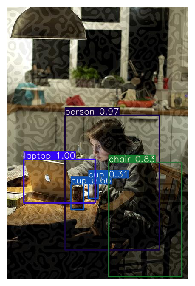

In [0]:
# result = detect(model, "data/samples/zidane-perturbed.jpg")
# # Model returns [[x1, y1, x2, y2, conf, cls_conf, cls]]
# print(result)

import skimage

#filtered_img = skimage.filters.gaussian(io.imread('output/perturbed.jpg'))
#
#io.imshow(filtered_img)
#io.imsave('data/filtered_aeroplanes.jpg',filtered_img)

img = io.imread("output/perturbed.jpg")
fig = plt.gcf()
fig.set_size_inches(9, 5)
plt.axis("off")
plt.imshow(img)
plt.show()

In [0]:
#!bash data/get_coco_dataset.sh
!bash data/get_coco_val.sh

fatal: destination path 'coco' already exists and is not an empty directory.
mkdir: cannot create directory ‘images’: File exists
--2019-06-04 11:17:36--  https://pjreddie.com/media/files/val2014.zip
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6645013297 (6.2G) [application/zip]
Saving to: ‘val2014.zip’

val2014.zip           0%[                    ]  44.96M  27.9MB/s               ^C


In [0]:
%cd coco
!paste <(awk "{print \"$PWD\"}" <5k.part) 5k.part | tr -d '\t' > 5k.txt
!paste <(awk "{print \"$PWD\"}" <trainvalno5k.part) trainvalno5k.part | tr -d '\t' > trainvalno5k.txt

%cd ..
!ls

/content/yolov3/coco
/content/yolov3
cfg   data	 LICENSE    output     requirements.txt  train.py  weights
coco  detect.py  models.py  README.md  test.py		 utils


In [0]:
from utils.datasets import *
from utils.utils import *
from itertools import islice

device = torch_utils.select_device()

model.cuda()

d_loader = LoadImagesAndLabels('data/32.txt', img_size=416)

for batch_i, (imgs, targets) in enumerate(d_loader):
#   print(batch_i, targets)
  output = model(imgs.to(device))
  output = non_max_suppression(output, conf_thres=conf_thres, nms_thres=nms_thres)

  # Compute average precision for each sample
  for sample_i, (labels, detections) in enumerate(zip(targets, output)):
    print(labels)

In [0]:
!mv coco/images /images

In [0]:
# !python3 test.py --weights weights/yolov3.weights
from test import test

test(
        model,
        data_cfg='cfg/coco.data',
        batch_size=32,
        img_size=416,
        iou_thres=0.5,
        conf_thres=0.3,
        nms_thres=0.45
)

Namespace(batch_size=32, cfg='cfg/yolov3.cfg', conf_thres=0.3, data_cfg='cfg/coco.data', img_size=416, iou_thres=0.5, nms_thres=0.45, save_json=False, weights='weights/yolov3.weights')

Traceback (most recent call last):
  File "test.py", line 177, in <module>
    mdl = Darknet(opt.cfg, opt.img_size)
  File "/content/yolov3/models.py", line 176, in __init__
    self.hyperparams, self.module_list = create_modules(self.module_defs)
  File "/content/yolov3/models.py", line 67, in create_modules
    yolo_layer = YOLOLayer(anchors, nC, img_size, yolo_layer_count, cfg=hyperparams['cfg'])
  File "/content/yolov3/models.py", line 109, in __init__
    create_grids(self, 32, 1, device=device)
  File "/content/yolov3/models.py", line 220, in create_grids
    self.grid_xy = torch.stack((grid_x, grid_y), 4).to(device)
RuntimeError: CUDA error: out of memory


Using cuda:0

image 1/1 data/samples/aeroplanes.jpg: 6 aeroplanes, Done. (0.102s)


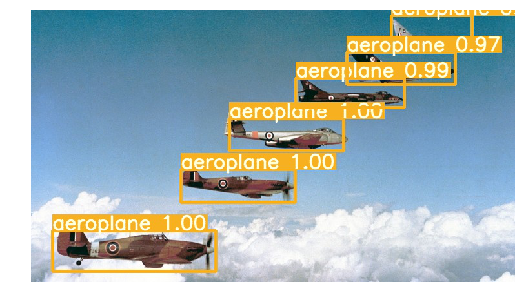

In [0]:
detect(model, "data/samples/aeroplanes.jpg")

img = io.imread("output/aeroplanes.jpg")
fig = plt.gcf()
fig.set_size_inches(9, 5)
plt.axis("off")
plt.imshow(img)
plt.show()

In [0]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.9 GB  | Proc size: 142.3 MB
GPU RAM Free: 11441MB | Used: 0MB | Util   0% | Total 11441MB


In [0]:
!kill -9 -1